In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

In [38]:
data = np.loadtxt('decay.txt')

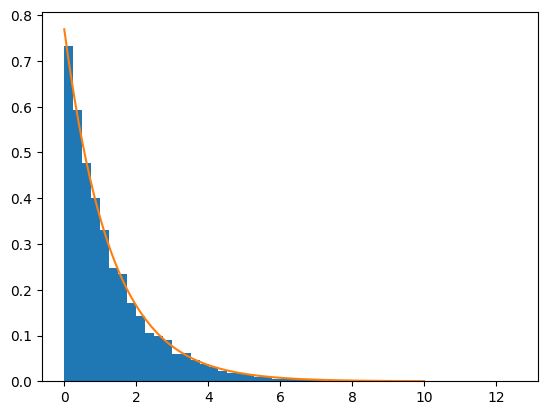

In [39]:
pdf = lambda t, tau: 1/tau * np.exp(-t/tau)

plt.hist(data, 50, density=True)
plt.plot(np.linspace(0, 10, 100), pdf(np.linspace(0, 10, 100), 1.3))

In [40]:
tau_hat = sum(data / (len(data)+1))

sigma_hat = 1/np.sqrt(sum([-1/tau_hat**2 + 2*d / tau_hat**3 for d in data]))

tau_hat, sigma_hat

(np.float64(1.2530776922307834), np.float64(0.012529524032545987))

In [79]:

from iminuit import Minuit
m = Minuit(twiceNLL, tau=tau_hat)
m.migrad()

m.values['tau'], m.errors['tau']

(1.2532034630787514, 0.012532033768211047)

Optimization terminated successfully.
         Current function value: 24514.053479
         Iterations: 11
         Function evaluations: 22


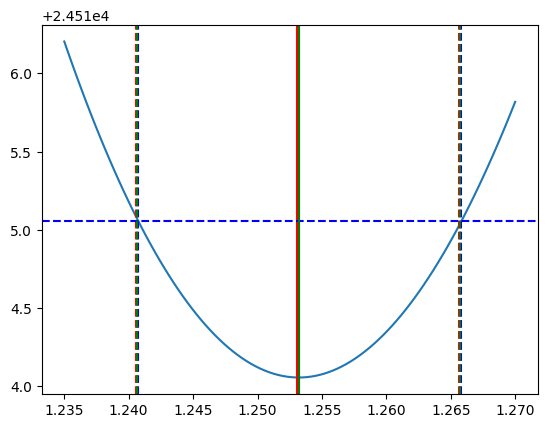

In [86]:
twiceNLL = lambda tau: -2*np.sum(np.log(pdf(data, tau)))

x = np.linspace(1.235, 1.27, 100)
plt.plot(x, [twiceNLL(tau) for tau in x])
plt.axvline(tau_hat, color='r')
plt.axvline(tau_hat - sigma_hat, color='r', linestyle='--')
plt.axvline(tau_hat + sigma_hat, color='r', linestyle='--')

#from NLL
tau_nll = sp.optimize.fmin(twiceNLL, tau_hat)
sigma_nll_up = sp.optimize.minimize(lambda x: np.abs(1 + twiceNLL(tau_nll) - twiceNLL(tau_nll + x)), sigma_hat).x
sigma_nll_dn = sp.optimize.minimize(lambda x: np.abs(1 + twiceNLL(tau_nll) - twiceNLL(tau_nll - x)), sigma_hat).x

plt.axvline(NLL_min, color='b')
plt.axvline(NLL_min - sigma_nll_dn, color='b', linestyle='--')
plt.axvline(NLL_min + sigma_nll_up, color='b', linestyle='--')
plt.axhline(twiceNLL(tau_hat) + 1, color='b', linestyle='--')


# from minuit

plt.axvline(m.values['tau'], color='g')
plt.axvline(m.values['tau'] - m.errors['tau'], color='g', linestyle='--')
plt.axvline(m.values['tau'] + m.errors['tau'], color='g', linestyle='--')
